(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-09-19/notebook/code_demo.ipynb)

# Python basics - additional topics

## Class and Objects in Python

In general
- A `class` is a blueprint for declaring and creating objects
- An `object` is a class instance that allows programmers to use variables and methods from inside the class
- A class defines a set of `attributes` (`<--> properties`) and `methods` (`<--> functions`) that the objects of that class will have.

### Create a class in Python

In [ ]:
class table:
    def __init__(self, l, w, h):
        self.l = l
        self.w = w
        self.h = h
        self.has_a_flat_top = True
    
    def hold_weight(self, weight):
        print('Holding a weight of {weight} kg')

### Create an object out of a class

### Access the attributes and methods of an object
You can access the `attributes` and `methods` of class `table` use the following pattern
```python
table_1.l
table_1.w
table_1.h
table_1.has_a_flat_top
table_1.hold_weight(weight=10)
```

### Class inheritance
In Python, `class inheritance` is a mechanism by which a new class can be created from an existing class, inheriting its attributes and methods. The new class is called a `subclass` or `derived class`, while the existing class is called the `superclass` or `base class`.

To create a subclass in Python, you can define a new class that inherits from the superclass using the syntax `class Subclass(Superclass)`

```mermaid
flowchart TD
    animal-->dog
    animal-->cat
```

```python
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        pass

class Dog(Animal):
    pass

class Cat(Animal):
    pass

```

## Files and `I/O`
* Major tool/function: `open(file, mode='r')` (https://docs.python.org/3/library/functions.html#open)
* The default mode is 'r' (open for reading text, synonym of 'rt'). The available modes:

    | Character | Meaning                                                         |
    |-----------|-----------------------------------------------------------------|
    | 'r'       | open for reading (default)                                      |
    | 'w'       | open for writing, truncating the file first                     |
    | 'a'       | open for writing, appending to the end of the file if it exists |
    | 'b'       | binary mode                                                     |

**read**

In [ ]:
## Read from a file
var = 'test-read.txt'
fr = open(var,'r') # create one file handle
lines = fr.readlines() # read all into a list
fr.close()

In [ ]:
## Another convenient way to automatically handle file handle closure

with open('test-read.txt','r') as fr:
    for line in fr.readlines():
        print(line)

In [ ]:
with open('test-read.txt','r') as fr:
    for line in fr:
        print(line)

**write**

In [ ]:
## open file in 'w' mode
fw = open('test-write-1.txt','w')
fw.write('this is a test')
fw.close()

In [ ]:
with open('test-write-1.txt','r') as fr:
    for line in fr:
        print(line)

In [ ]:
## Write new content to a file
with open('test-write.txt','w') as fw:
    for i in range(6,11):
        fw.write(f'this is line {i}\n')

In [ ]:
## Append to an existing file
with open('test-write.txt','w') as fw:
    for i in range(4,7):
        fw.write(f'this is line {i}\n')

**append** - the correct way

In [ ]:
## Read and write
with open('test-write.txt','a') as fa:
    fa.write('this is a new line\n')
    for i in range(7,10):
        fa.write(f'this is line {i}\n')

## Library import in depth
### A simple Python package
Assume we have a package with the following file distribution
```md
└── sample_package
    └── sample.py
    └── subpackage
        └── subsample.py
```
The content of `sample.py` is like
```python
x = 123
y = 234

def hello():
    print('Hello World')
```

The content of `subsample.py`
```python
xx = 1
yy = 2
```

### Things might be more complicated
![](../pics/library_tree.png)

***You could***
* `import` the whole library, by `import a`
* `import` a module (python script), by `import a.aa`
* `import` a object (variable, function, class, etc.) in a module, by `import a.aa.aaa`, or `from a.aa import aaa`


**However**, you should keep using the `<object>` name in the `import <object>` statement in your program to reference the object you imported. **Sometimes, this could be quite inconvenient** because the `<object>` string could be pretty long due to the complicatedd file structures in the python library

**There are two ways** to solve the problem:
* `from a import aa` (use the `from` statement to reference the complicated folder relationships)
* `import a.aa as aa` (create an alias)

In [ ]:
%%sh

tree sample_package

In [ ]:
from sample_package.sample import hello
hello()

In [ ]:
from sample_package.subpackage.subsample import xx

In [ ]:
xx

# Numpy recap

## import `numpy`

In [ ]:
import numpy as np

In [ ]:
# import numpy

## Create numpy arrays

In [ ]:
# create a numpy array out of a list
aList = [1,2,3,4]
aNumpyArray = np.array(aList)

In [ ]:
aNumpyArray

In [ ]:
type(aNumpyArray)

In [ ]:
# check the dimension of the numpy array
aNumpyArray.ndim

In [ ]:
# the shape of a numpy array
aNumpyArray.shape

In [ ]:
len(aNumpyArray)

In [ ]:
# get the absolute size/length of a vector
bList = [3,4]
bNumpyArray = np.array(bList)
np.linalg.norm(bNumpyArray)

In [ ]:
# a 2D example
aNumpyArray = np.array([2, 0, 0, 2]).reshape(2,2)

In [ ]:
aNumpyArray

In [ ]:
aNumpyArray.ndim

In [ ]:
aNumpyArray.shape

In [ ]:
## get the inverse of the 1D vector
np.linalg.inv(aNumpyArray)

## Operations on numpy arrays

In [ ]:
aNumpyArray.T

In [ ]:
a = np.array(aList).reshape(2,2)
b = np.eye(2)

In [ ]:
a

In [ ]:
b

In [ ]:
a.dot(b)

## Generate random numbers with `numpy`

In [ ]:
np.random.rand(3)

In [ ]:
np.random.randn(2,2)

In [ ]:
np.random.randint(low=0, high=10, size=100)

## Example

### `axis` in numpy array

### `np.sum()` - [[*official doc*](https://numpy.org/doc/stable/reference/generated/numpy.sum.html#numpy.sum), [*how does `axis` work in numpy*](https://stackoverflow.com/questions/22320534/how-does-the-axis-parameter-from-numpy-work)]

#### For 1D array (or vector)

In [ ]:
vector = np.array([1,2,3])
np.sum(vector)

In [ ]:
vector.sum()

#### For 2D array (or matrix)
- `axis = 0` is equivalent to $\sum_{i}{A_{ij}}$
- `axis = 1` is equivalent to $\sum_{j}{A_{ij}}$
- `axis = None` (default) is equivalent to $\sum_{i,j}{A_{ij}}$

In [ ]:
matrix = np.array([
    [1,2,3],
    [4,5,6]
])

In [ ]:
matrix.sum(axis=0)

In [ ]:
matrix.sum(axis=1)

In [ ]:
matrix.sum()

### The `length` - the $L_2$ norm
#### For 1D vector

In [ ]:
vector = np.array([3,4])
np.linalg.norm(vector)

#### For 2D array
- `axis = 0` is equivalent to $\sqrt{\sum_{i}|A_{ij}|^2}$
- `axis = 1` is equivalent to $\sqrt{\sum_{j}|A_{ij}|^2}$
- `axis = None` (default) is equivalent to $\sqrt{\sum_{i,j}|A_{ij}|^2}$

In [ ]:
# Calculating the norm of a 2D array (matrix)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

# Calculate the L2 (Euclidean) norm along different axes
l2_norm_axis_0 = np.linalg.norm(matrix, axis=0)  # Calculate along columns (axis=0)
l2_norm_axis_1 = np.linalg.norm(matrix, axis=1)  # Calculate along rows (axis=1)
l2_norm_axis_none = np.linalg.norm(matrix) # Calculate on the flattened array

print("L2 Norm along columns (axis=0):", l2_norm_axis_0)
print("L2 Norm along rows (axis=1):", l2_norm_axis_1)
print("L2 Norm along rows (axis=None):", l2_norm_axis_none)


#### For 3D array
- `axis = 0` is equivalent to $\sqrt{\sum_{i}|A_{ijk}|^2}$
- `axis = 1` is equivalent to $\sqrt{\sum_{j}|A_{ijk}|^2}$
- `axis = 2` is equivalent to $\sqrt{\sum_{k}|A_{ijk}|^2}$
- `axis = None` (default) is equivalent to $\sqrt{\sum_{i,j,k}|A_{ijk}|^2}$

In [ ]:
import numpy as np

# Create a 3D array (3x4x2)
array_3d = np.array([
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8]
    ],
    [
        [9, 10],
        [11, 12],
        [13, 14],
        [15, 16]
    ],
    [
        [17, 18],
        [19, 20],
        [21, 22],
        [23, 24]
    ]
])

print(f"The shape of the 3D array: {array_3d.shape}")

# Calculate the L2 norm along different axes
l2_norm_axis_0 = np.linalg.norm(array_3d, axis=0)  # Calculate along the first dimension (axis=0)
l2_norm_axis_1 = np.linalg.norm(array_3d, axis=1)  # Calculate along the second dimension (axis=1)
l2_norm_axis_2 = np.linalg.norm(array_3d, axis=2)  # Calculate along the third dimension (axis=2)

print("L2 Norm along the first dimension (axis=0):")
print(l2_norm_axis_0)

print("\nL2 Norm along the second dimension (axis=1):")
print(l2_norm_axis_1)

print("\nL2 Norm along the third dimension (axis=2):")
print(l2_norm_axis_2)





### Nearest neighbor search

Euclidean distance between 2 points $(x_1,y_1,z_1)$ and $(x_2,y_2,z_2)$ is:
$$\sqrt{(x_2-x_1)^2+(y_2-y1)^2+(z_2-z_1)^2}$$

In [ ]:
### Pure iterative Python ###
points = [[9,2,8],[4,7,2],[3,4,4],[5,6,9],[5,0,7],[8,2,7],[0,3,2],[7,3,0],[6,1,1],[2,9,6]]
target = [4,5,3]

shortest_distance = 10 ** 10
nearest_neighbor = []
for point in points:
    x,y,z = point
    x0,y0,z0 = target
    # magic to calculate the distance
    d = ((x-x0)**2 + (y-y0)**2 + (z-z0)**2) ** 0.5
    # figure out if this distance is the minimum distance
    if d <= shortest_distance:
        shortest_distance = d
        nearest_neighbor = [x,y,z]
    
    # if so, print the distance and point, and disclare that this is the closest data point to qPoint

print(f'The shortest distance to the target is {shortest_distance}')
print(f'The nearest neighbor is {nearest_neighbor}')

In [ ]:
# # # Equivalent NumPy vectorization # # #
import numpy as np
points = np.array([[9,2,8],[4,7,2],[3,4,4],[5,6,9],[5,0,7],[8,2,7],[0,3,2],[7,3,0],[6,1,1],[2,9,6]])
# points.shape
target = np.array([4,5,3]).reshape(1,3)
distances = np.linalg.norm(points-target,axis=1)
minIdx = np.argmin(distances)  # compute all euclidean distances at once and return the index of the smallest one
print(f'The shortest distance to the target is {distances[minIdx]}')
print(f'The nearest neighbor is {points[minIdx]}')

# Pandas

* `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.
* It is included in the installation of the Anaconda distribution
* When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool for you. pandas will help you to explore, clean and process your data. In pandas, a data table is called a `DataFrame`.

<img align="center" src="../pics/dataframe-structure.png" style="height:300px;">


## Import the core libraries

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

## Important data structures - `Series` and `DataFrame`

### `Series`
A `Series` is a one-dimensional `array-like` object containing a sequence of values (of similar types to NumPy types) of the same type and an associated array of data labels, called its `index`.

In [ ]:
x = pd.Series([1,2,3,4])
x

In [ ]:
# the array part
x.array

In [ ]:
# the index part
x.index

In [ ]:
y = pd.Series([1,3,5,7,9],index=['a','b','c','d','e'])
y

In [ ]:
type(y)

In [ ]:
y['a']

In [ ]:
# mutable
y['c'] = 11

In [ ]:
y

**Just like 1D numpy arrays ...**

In [ ]:
y.ndim

In [ ]:
y.shape

`series` could also be converted to a dictionary

In [ ]:
y.to_dict()

### `DataFrame`

#### Create `dataframe` from raw data

In [118]:
import pandas as pd

In [119]:
# create df from a dictionary
x = {
    'A':[1,2,'a',4],
    'B':np.arange(5,9),
    'C':['abc','def','ghi','jkl']
}

df1 = pd.DataFrame(x)

In [120]:
df1

,A,B,C
0,1,5,abc
1,2,6,def
2,a,7,ghi
3,4,8,jkl


In [121]:
# create df from a list
y = [
    ['a','b','c'],
    ['d','e','f']
]

df2 = pd.DataFrame(y, columns=['col1','col2','col3'])
df2

,col1,col2,col3
0,a,b,c
1,d,e,f


In [122]:
# create df with fancier settings
z = {
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
}
df3 = pd.DataFrame(z) 

In [123]:
df3

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### Create `dataframe` from text file

In [124]:
df = pd.read_csv('../data/imf-gdp-per-capita-2015.csv')
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.32",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.30",2011.0
...,...,...,...,...,...,...,...
184,Venezuela,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","7,744.75",2010.0
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,088.34",2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,302.94",2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,350.15",2010.0


In [125]:
df = pd.read_csv('../data/imf-gdp-per-capita-2015.csv',sep=',',header=0)

In [126]:
df.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14",2014.0


**Just like in `numpy arrays`**

In [127]:
df.shape

(189, 7)

In [128]:
df.ndim

2

**Something more ...**

In [129]:
df.dtypes

Country                           object
Subject Descriptor                object
Units                             object
Scale                             object
Country/Series-specific Notes     object
2015                              object
Estimates Start After            float64
dtype: object

In [130]:
df.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [131]:
list(df.columns)

['Country',
 'Subject Descriptor',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 '2015',
 'Estimates Start After']

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        189 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    object 
 6   Estimates Start After          188 non-null    float64
dtypes: float64(1), object(6)
memory usage: 10.5+ KB


**A little bit reformatting ...**

In [133]:
df = pd.read_csv('../data/imf-gdp-per-capita-2015.csv',sep=',',header=0, thousands=',')
df.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        189 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


#### Create `dataframe` from excel spreadsheet

In [135]:
# pd.read_excel() # press shift + tab

In [136]:
## import from excel spreadsheet (need to have package `openpyxl` pre-installed)
df2 = pd.read_excel(io='../data/excel-test-file.xlsx', sheet_name='tab1', header=0)

df2.head(5)

,col1,col2,col3
0,1,a,a12
1,2,b,b23
2,3,c,c31


In [137]:
df3 = pd.read_excel(io='../data/excel-test-file.xlsx',sheet_name='tab2',header=0)
df3.head(3)

,col4,col5
0,d,4
1,e,5
2,f,6


## View `dataframe`

In [138]:
# create a dataframe from a numpy array, with columns labeled
df = pd.DataFrame(np.random.randn(6,4), columns = ['Ann', "Bob", "Charly", "Don"])
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


**df.head()**

In [139]:
df.head(2)

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102


In [140]:
df.head()

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499


**df.tail()**

In [141]:
df.tail(2)

,Ann,Bob,Charly,Don
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [142]:
df.tail()

,Ann,Bob,Charly,Don
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


**`dataframe` attributes**

In [145]:
type(df)

pandas.core.frame.DataFrame

In [143]:
list(df.columns)

['Ann', 'Bob', 'Charly', 'Don']

In [144]:
list(df.index)

[0, 1, 2, 3, 4, 5]

In [146]:
df.ndim

2

In [149]:
df.shape

(6, 4)

In [147]:
len(df)

6

In [150]:
df.dtypes

Ann       float64
Bob       float64
Charly    float64
Don       float64
dtype: object

In [151]:
df.values # convert df to numpy array

array([[-0.74311677,  1.56497205,  1.19968816,  0.63847707],
       [-1.64108122, -0.79445647, -0.75041307, -0.02510211],
       [ 0.52323517, -0.81338777, -0.54383507,  2.411238  ],
       [ 1.1934387 ,  0.62936342, -0.84850626,  1.24391678],
       [ 1.1747195 ,  0.72050475,  0.48375894,  1.22949885],
       [ 0.0961689 ,  0.46501922,  0.2539612 ,  0.78577987]])

In [152]:
df.values.shape

(6, 4)

In [153]:
# you can also do
df.to_numpy()

array([[-0.74311677,  1.56497205,  1.19968816,  0.63847707],
       [-1.64108122, -0.79445647, -0.75041307, -0.02510211],
       [ 0.52323517, -0.81338777, -0.54383507,  2.411238  ],
       [ 1.1934387 ,  0.62936342, -0.84850626,  1.24391678],
       [ 1.1747195 ,  0.72050475,  0.48375894,  1.22949885],
       [ 0.0961689 ,  0.46501922,  0.2539612 ,  0.78577987]])

In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    3 non-null      int64 
 1   col2    3 non-null      object
 2   col3    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


**df.describe()**

In [155]:
df.describe() # generate descriptive stats on the data

,Ann,Bob,Charly,Don
count,6.000000,6.000000,6.000000,6.000000
mean,0.100561,0.295336,-0.034224,1.047301
std,1.119998,0.932741,0.813582,0.814587
min,-1.641081,-0.813388,-0.848506,-0.025102
25%,-0.533295,-0.479588,-0.698769,0.675303
50%,0.309702,0.547191,-0.144937,1.007639
75%,1.011848,0.697719,0.426310,1.240312
max,1.193439,1.564972,1.199688,2.411238


**df.transpose()**

In [156]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [157]:
# transpose a datafrme

df.transpose()
# type(df.transpose())

,0,1,2,3,4,5
Ann,-0.743117,-1.641081,0.523235,1.193439,1.174720,0.096169
Bob,1.564972,-0.794456,-0.813388,0.629363,0.720505,0.465019
Charly,1.199688,-0.750413,-0.543835,-0.848506,0.483759,0.253961
Don,0.638477,-0.025102,2.411238,1.243917,1.229499,0.785780


In [158]:
df.T # you can also do it this way

,0,1,2,3,4,5
Ann,-0.743117,-1.641081,0.523235,1.193439,1.174720,0.096169
Bob,1.564972,-0.794456,-0.813388,0.629363,0.720505,0.465019
Charly,1.199688,-0.750413,-0.543835,-0.848506,0.483759,0.253961
Don,0.638477,-0.025102,2.411238,1.243917,1.229499,0.785780


**sort `dataframe`**

In [159]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [160]:
# sort_index(), by labels (index or column)
# df
df.sort_index(axis=0, ascending=False)

,Ann,Bob,Charly,Don
5,0.096169,0.465019,0.253961,0.785780
4,1.174720,0.720505,0.483759,1.229499
3,1.193439,0.629363,-0.848506,1.243917
2,0.523235,-0.813388,-0.543835,2.411238
1,-1.641081,-0.794456,-0.750413,-0.025102
0,-0.743117,1.564972,1.199688,0.638477


In [161]:
df.sort_index(axis=1, ascending=False)

,Don,Charly,Bob,Ann
0,0.638477,1.199688,1.564972,-0.743117
1,-0.025102,-0.750413,-0.794456,-1.641081
2,2.411238,-0.543835,-0.813388,0.523235
3,1.243917,-0.848506,0.629363,1.193439
4,1.229499,0.483759,0.720505,1.174720
5,0.785780,0.253961,0.465019,0.096169


In [162]:
# sort_values(), by values
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [163]:
df.sort_values(by='Ann', ascending=True)
# df.sort_values(by=['Ann','Bob'], ascending=True)

,Ann,Bob,Charly,Don
1,-1.641081,-0.794456,-0.750413,-0.025102
0,-0.743117,1.564972,1.199688,0.638477
5,0.096169,0.465019,0.253961,0.785780
2,0.523235,-0.813388,-0.543835,2.411238
4,1.174720,0.720505,0.483759,1.229499
3,1.193439,0.629363,-0.848506,1.243917


## Select `dataframe`

Pandas documentation on select and indexing `dataframe`:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing
* https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced

### The different ways

| Type                  | Notes                                       |
|-----------------------|---------------------------------------------|
| `df[column]`          | Select by column labels                     |
| `df.loc[rows]`        | Select by row labels                        |
| `df.loc[:, cols]`     | Select by column labels                     |
| `df.loc[rows, cols]`  | Select by row and column labels             |
| `df.iloc[rows]`       | Select by row positional indices            |
| `df.iloc[:, cols]`    | Select by column positional indices         |
| `df.iloc[rows, cols]` | Select by row and column positional indices |
| `df.at[row, col]`     | Select an element by row and column labels  |
| `df.iat[row, col]`    | Select an element by row and column indices |

In [164]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


### Single column vs. multiple columns

In [165]:
df['Ann']

0   -0.743117
1   -1.641081
2    0.523235
3    1.193439
4    1.174720
5    0.096169
Name: Ann, dtype: float64

In [166]:
type(df)

pandas.core.frame.DataFrame

In [167]:
type(df['Ann'])

pandas.core.series.Series

In [168]:
df.Ann

0   -0.743117
1   -1.641081
2    0.523235
3    1.193439
4    1.174720
5    0.096169
Name: Ann, dtype: float64

In [169]:
type(df['Ann'])

pandas.core.series.Series

Selecting multiple columns yields a dataframe, which references a subset of the original dataframe. Note you are NOT creating a new copy here!

In [170]:
df[['Ann','Bob']]

,Ann,Bob
0,-0.743117,1.564972
1,-1.641081,-0.794456
2,0.523235,-0.813388
3,1.193439,0.629363
4,1.174720,0.720505
5,0.096169,0.465019


In [171]:
type(df[['Ann','Bob']])

pandas.core.frame.DataFrame

In [172]:
df[['Ann']]

,Ann
0,-0.743117
1,-1.641081
2,0.523235
3,1.193439
4,1.174720
5,0.096169


### Select by labels
* You could use `.loc` method of `dataframe` to select data by labels. Typical format is like
```python
df.loc[row_indexer, column_indexer]
```
* More details can be found here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing


In [185]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [186]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [187]:
# by row label
df.loc[0]

Ann      -0.743117
Bob       1.564972
Charly    1.199688
Don       0.638477
Name: 0, dtype: float64

In [188]:
# by row and column label
df.loc[[0,1],['Ann','Bob']]

,Ann,Bob
0,-0.743117,1.564972
1,-1.641081,-0.794456


In [189]:
df.loc[0,['Ann','Bob']] # get a Series

Ann   -0.743117
Bob    1.564972
Name: 0, dtype: float64

In [191]:
df.loc[0:2,['Ann','Bob']] # note here the row for `index=2` is also displayed

,Ann,Bob
0,-0.743117,1.564972
1,-1.641081,-0.794456
2,0.523235,-0.813388


In [192]:
# by column label only
df.loc[:,['Ann']] # note that you'll get a dataframe instead of a Series

,Ann
0,-0.743117
1,-1.641081
2,0.523235
3,1.193439
4,1.174720
5,0.096169


In [193]:
# what if I just want to get the value of a particular cell?
df.loc[2,'Ann']

0.5232351720264923

In [194]:
# you can also do
df.at[2,'Ann']

0.5232351720264923

### Select by Position

* You could use `.iloc` method of `dataframe` to select data by labels. Typical format is like
```python
df.iloc[row_position_indexer, column_position_indexer]
```
* More details can be found here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing

In [195]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [196]:
# select by row position
df.iloc[0]

Ann      -0.743117
Bob       1.564972
Charly    1.199688
Don       0.638477
Name: 0, dtype: float64

In [197]:
# select by row position range
df.iloc[0:2] # note that only the only one end of the range is included, different from df.loc

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102


In [198]:
# you can also do
df.iloc[0:2,]

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102


In [199]:
df.iloc[0:2,:]

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102


In [200]:
# select by column position range
df.iloc[:,0:2]

,Ann,Bob
0,-0.743117,1.564972
1,-1.641081,-0.794456
2,0.523235,-0.813388
3,1.193439,0.629363
4,1.174720,0.720505
5,0.096169,0.465019


In [201]:
# select by row and column position range
df.iloc[0:2,0:2]

,Ann,Bob
0,-0.743117,1.564972
1,-1.641081,-0.794456


In [202]:
# what if I just want to get the value of a particular cell?
df.iloc[0,0]

-0.7431167697552492

In [203]:
# you can also do
df.iat[0,0]

-0.7431167697552492

### Select by conditions

In [204]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [205]:
df[df.Ann>=0]

,Ann,Bob,Charly,Don
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [206]:
df.loc[df.Ann>=0,['Ann','Bob']]

,Ann,Bob
2,0.523235,-0.813388
3,1.193439,0.629363
4,1.174720,0.720505
5,0.096169,0.465019


In [207]:
df.loc[(df.Ann>=-0.5)&(df.Ann<=1.4),['Ann','Bob']]

,Ann,Bob
2,0.523235,-0.813388
3,1.193439,0.629363
4,1.174720,0.720505
5,0.096169,0.465019


## Set/change values - "mutable"

In [208]:
df

,Ann,Bob,Charly,Don
0,-0.743117,1.564972,1.199688,0.638477
1,-1.641081,-0.794456,-0.750413,-0.025102
2,0.523235,-0.813388,-0.543835,2.411238
3,1.193439,0.629363,-0.848506,1.243917
4,1.174720,0.720505,0.483759,1.229499
5,0.096169,0.465019,0.253961,0.785780


In [209]:
# add a new column
df['E'] = 5
df

,Ann,Bob,Charly,Don,E
0,-0.743117,1.564972,1.199688,0.638477,5
1,-1.641081,-0.794456,-0.750413,-0.025102,5
2,0.523235,-0.813388,-0.543835,2.411238,5
3,1.193439,0.629363,-0.848506,1.243917,5
4,1.174720,0.720505,0.483759,1.229499,5
5,0.096169,0.465019,0.253961,0.785780,5


In [210]:
df['F'] = np.arange(6)
df

,Ann,Bob,Charly,Don,E,F
0,-0.743117,1.564972,1.199688,0.638477,5,0
1,-1.641081,-0.794456,-0.750413,-0.025102,5,1
2,0.523235,-0.813388,-0.543835,2.411238,5,2
3,1.193439,0.629363,-0.848506,1.243917,5,3
4,1.174720,0.720505,0.483759,1.229499,5,4
5,0.096169,0.465019,0.253961,0.785780,5,5


In [211]:
# set values by labels
df.loc['2020-08-25','E'] = 3
# df.at['2020-08-25','E'] = 3
df

,Ann,Bob,Charly,Don,E,F
0,-0.743117,1.564972,1.199688,0.638477,5.0,0.0
1,-1.641081,-0.794456,-0.750413,-0.025102,5.0,1.0
2,0.523235,-0.813388,-0.543835,2.411238,5.0,2.0
3,1.193439,0.629363,-0.848506,1.243917,5.0,3.0
4,1.174720,0.720505,0.483759,1.229499,5.0,4.0
5,0.096169,0.465019,0.253961,0.785780,5.0,5.0
2020-08-25,NaN,NaN,NaN,NaN,3.0,NaN


In [212]:
# set values by position
df.iloc[0,5] = -1
df

,Ann,Bob,Charly,Don,E,F
0,-0.743117,1.564972,1.199688,0.638477,5.0,-1.0
1,-1.641081,-0.794456,-0.750413,-0.025102,5.0,1.0
2,0.523235,-0.813388,-0.543835,2.411238,5.0,2.0
3,1.193439,0.629363,-0.848506,1.243917,5.0,3.0
4,1.174720,0.720505,0.483759,1.229499,5.0,4.0
5,0.096169,0.465019,0.253961,0.785780,5.0,5.0
2020-08-25,NaN,NaN,NaN,NaN,3.0,NaN


In [213]:
# set values by condition
df.loc[df.Ann>0,'E'] = 4
df

,Ann,Bob,Charly,Don,E,F
0,-0.743117,1.564972,1.199688,0.638477,5.0,-1.0
1,-1.641081,-0.794456,-0.750413,-0.025102,5.0,1.0
2,0.523235,-0.813388,-0.543835,2.411238,4.0,2.0
3,1.193439,0.629363,-0.848506,1.243917,4.0,3.0
4,1.174720,0.720505,0.483759,1.229499,4.0,4.0
5,0.096169,0.465019,0.253961,0.785780,4.0,5.0
2020-08-25,NaN,NaN,NaN,NaN,3.0,NaN


### `Reindex`
Create a new object with the values rearranged to align with the new index

#### On `series`

In [217]:
x = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])

In [218]:
x

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [219]:
y = x.reindex(["a", "b", "c", "d", "e"])
y

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

#### On `dataframe`

In [220]:
df = pd.DataFrame(
    np.arange(9).reshape(3,3),
    index=['a', 'c', 'd'],
    columns=['Ohio', 'Texas', 'California']
)

df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [222]:
df2 = df.reindex(index=['a', 'b', 'c', 'd'])
df2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [223]:
df3 = df.reindex(columns=['Texas', 'Utah', 'California'])
df3

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


## Missing values

`pandas` primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) from `pandas` official documentation for more details.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [224]:
dates = pd.date_range(start='2020-08-25', end='2020-10-01', freq='7D')
dates

DatetimeIndex(['2020-08-25', '2020-09-01', '2020-09-08', '2020-09-15',
               '2020-09-22', '2020-09-29'],
              dtype='datetime64[ns]', freq='7D')

In [225]:
df1 = df.reindex(index=dates[:6],columns=list(df.columns)+['G'])
df1

,Ohio,Texas,California,G
2020-08-25,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN
2020-09-08,NaN,NaN,NaN,NaN
2020-09-15,NaN,NaN,NaN,NaN
2020-09-22,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN


In [226]:
# fill in values at some locations
df1.loc['2020-08-25':'2020-09-08','G'] = 1
df1

,Ohio,Texas,California,G
2020-08-25,NaN,NaN,NaN,1.0
2020-09-01,NaN,NaN,NaN,1.0
2020-09-08,NaN,NaN,NaN,1.0
2020-09-15,NaN,NaN,NaN,NaN
2020-09-22,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN


In [227]:
# to get the boolean mask where values are nan
df1.isna()

,Ohio,Texas,California,G
2020-08-25,True,True,True,False
2020-09-01,True,True,True,False
2020-09-08,True,True,True,False
2020-09-15,True,True,True,True
2020-09-22,True,True,True,True
2020-09-29,True,True,True,True


In [228]:
# you can also do
pd.isna(df1)

,Ohio,Texas,California,G
2020-08-25,True,True,True,False
2020-09-01,True,True,True,False
2020-09-08,True,True,True,False
2020-09-15,True,True,True,True
2020-09-22,True,True,True,True
2020-09-29,True,True,True,True


In [229]:
# drop any rows that have missing values
df2 = df1.copy()
df2.dropna(how='any')

,Ohio,Texas,California,G


In [230]:
df2 # df2 is not impacted since the inplace flag is not flipped

,Ohio,Texas,California,G
2020-08-25,NaN,NaN,NaN,1.0
2020-09-01,NaN,NaN,NaN,1.0
2020-09-08,NaN,NaN,NaN,1.0
2020-09-15,NaN,NaN,NaN,NaN
2020-09-22,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN


In [231]:
# fill missing values
df1.fillna(value=-999)

,Ohio,Texas,California,G
2020-08-25,-999.0,-999.0,-999.0,1.0
2020-09-01,-999.0,-999.0,-999.0,1.0
2020-09-08,-999.0,-999.0,-999.0,1.0
2020-09-15,-999.0,-999.0,-999.0,-999.0
2020-09-22,-999.0,-999.0,-999.0,-999.0
2020-09-29,-999.0,-999.0,-999.0,-999.0


## Operations on `dataframe`

**Stats**

In [232]:
df.describe()

,Ohio,Texas,California
count,3.0,3.0,3.0
mean,3.0,4.0,5.0
std,3.0,3.0,3.0
min,0.0,1.0,2.0
25%,1.5,2.5,3.5
50%,3.0,4.0,5.0
75%,4.5,5.5,6.5
max,6.0,7.0,8.0


In [233]:
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [234]:
# df.mean()
list(df.mean())

[3.0, 4.0, 5.0]

In [235]:
df.mean()

Ohio          3.0
Texas         4.0
California    5.0
dtype: float64

In [236]:
df.mean().values

array([3., 4., 5.])

In [237]:
df.mean(axis=0)

Ohio          3.0
Texas         4.0
California    5.0
dtype: float64

In [238]:
df.mean(axis=1)

a    1.0
c    4.0
d    7.0
dtype: float64

**Histogram**

In [239]:
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [241]:
df['histcol'] = np.random.randint(0,3,size=3)
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,2
d,6,7,8,2


In [242]:
df.histcol.value_counts()

histcol
2    3
Name: count, dtype: int64

In [243]:
df.histcol.nunique()

1

In [244]:
df.histcol.unique()

array([2])

<Axes: >

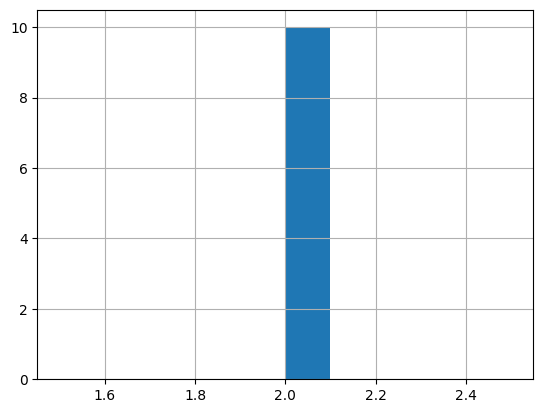

In [245]:
# df.histcol.hist()
df.histcol.hist(density=True)

**Apply functions/logics to the data**

In [246]:
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,2
d,6,7,8,2


In [247]:
df.apply(np.cumsum) # apply the function on all columns

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,5,7,4
d,9,12,15,6


In [248]:
df.apply(lambda x: -x) # apply the function on all columns

,Ohio,Texas,California,histcol
a,0,-1,-2,-2
c,-3,-4,-5,-2
d,-6,-7,-8,-2


In [250]:
df.California.map(lambda x: x+1) # apply the function on one single column

a    3
c    6
d    9
Name: California, dtype: int64

## `dataframe` and table operations

In [251]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['a','b','c','d'])
df

,a,b,c,d
0,-1.116525,1.920347,0.415649,-0.566448
1,2.286615,-0.655284,-0.204284,-0.255467
2,-0.772478,1.077000,0.684072,-0.101266
3,-0.160024,1.688850,-0.498130,-0.894739
4,-0.471637,-0.244037,-1.628681,0.021461
5,-0.256979,-0.359261,0.022051,0.752012
6,1.296027,0.084638,1.601882,0.138393
7,-0.562055,0.248960,1.890871,2.666071
8,0.961141,0.196599,-1.495647,0.184595
9,-0.687496,-0.197995,1.548321,0.799272


**Concat**

In [252]:
pieces = [df[:3], df[7:]]
print("pieces:\n", pieces)
print("put back together:\n")
# pd.concat(pieces, axis=1)
pd.concat(pieces, axis=0)

pieces:
 [          a         b         c         d
0 -1.116525  1.920347  0.415649 -0.566448
1  2.286615 -0.655284 -0.204284 -0.255467
2 -0.772478  1.077000  0.684072 -0.101266,           a         b         c         d
7 -0.562055  0.248960  1.890871  2.666071
8  0.961141  0.196599 -1.495647  0.184595
9 -0.687496 -0.197995  1.548321  0.799272]
put back together:



,a,b,c,d
0,-1.116525,1.920347,0.415649,-0.566448
1,2.286615,-0.655284,-0.204284,-0.255467
2,-0.772478,1.077000,0.684072,-0.101266
7,-0.562055,0.248960,1.890871,2.666071
8,0.961141,0.196599,-1.495647,0.184595
9,-0.687496,-0.197995,1.548321,0.799272


**Joins**

More details at https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
![](joins.jpg)

In [255]:
tb1 = pd.DataFrame({'key': ['foo', 'boo', 'foo'], 'lval': [1, 2, 3]})
tb2 = pd.DataFrame({'key': ['foo', 'coo'], 'rval': [5, 6]})

In [256]:
tb1

,key,lval
0,foo,1
1,boo,2
2,foo,3


In [257]:
tb2

,key,rval
0,foo,5
1,coo,6


In [258]:
pd.merge(tb1, tb2, on='key', how='inner')

,key,lval,rval
0,foo,1,5
1,foo,3,5


In [259]:
pd.merge(tb1, tb2, on='key', how='left')

,key,lval,rval
0,foo,1,5.0
1,boo,2,NaN
2,foo,3,5.0


In [260]:
pd.merge(tb1, tb2, on='key', how='right')

,key,lval,rval
0,foo,1.0,5
1,foo,3.0,5
2,coo,NaN,6


In [261]:
pd.merge(tb1, tb2, on='key', how='outer')

,key,lval,rval
0,foo,1.0,5.0
1,foo,3.0,5.0
2,boo,2.0,NaN
3,coo,NaN,6.0


**Grouping**

By `group by` we are referring to a process involving one or more of the following steps

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure
See the Grouping section from the `pandas` official documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [262]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.905177,0.434888
1,bar,one,-0.870119,0.629314
2,foo,two,-0.745392,1.819754
3,bar,three,0.249987,-0.164177
4,foo,two,0.512993,-0.500404
5,bar,two,0.584448,-0.056051
6,foo,one,-0.223952,-0.680553
7,foo,three,0.268748,-0.791134


In [263]:
df.groupby('A')['C'].mean().reset_index() # simple stats grouped by 1 column

,A,C
0,bar,-0.011895
1,foo,0.143515


In [264]:
df.groupby(['A','B']).sum().reset_index() # simple stats grouped by multiple columns

,A,B,C,D
0,bar,one,-0.870119,0.629314
1,bar,three,0.249987,-0.164177
2,bar,two,0.584448,-0.056051
3,foo,one,0.681225,-0.245665
4,foo,three,0.268748,-0.791134
5,foo,two,-0.232400,1.319350


In [265]:
df.groupby(['A','B']).mean().reset_index() # simple stats grouped by multiple columns

,A,B,C,D
0,bar,one,-0.870119,0.629314
1,bar,three,0.249987,-0.164177
2,bar,two,0.584448,-0.056051
3,foo,one,0.340613,-0.122832
4,foo,three,0.268748,-0.791134
5,foo,two,-0.116200,0.659675


In [266]:
# df.groupby(['A','B'])['C'].apply(lambda x: np.sum(x**2)).reset_index() # customized aggregation
df.groupby(['A','B'])['C'].apply(lambda x: np.sum(x)).reset_index() # customized aggregation

,A,B,C
0,bar,one,-0.870119
1,bar,three,0.249987
2,bar,two,0.584448
3,foo,one,0.681225
4,foo,three,0.268748
5,foo,two,-0.232400


## Write/Export `dataframe` to files

**CSV file**

In [267]:
df

,A,B,C,D
0,foo,one,0.905177,0.434888
1,bar,one,-0.870119,0.629314
2,foo,two,-0.745392,1.819754
3,bar,three,0.249987,-0.164177
4,foo,two,0.512993,-0.500404
5,bar,two,0.584448,-0.056051
6,foo,one,-0.223952,-0.680553
7,foo,three,0.268748,-0.791134


In [268]:
df.to_csv('../data/to-csv-test.csv',sep=',',header=True,index=None)

**Excel spreadsheet**

In [269]:
df.to_excel('../data/to-excel-test.xlsx',sheet_name='tab1',header=True,index=None)